In [1]:
print("all ok!")

all ok!


In [4]:
!pip install -U langgraph

  Using cached langgraph-0.6.8-py3-none-any.whl.metadata (6.8 kB)
  Using cached langgraph_checkpoint-2.1.1-py3-none-any.whl.metadata (4.2 kB)
  Using cached langgraph_prebuilt-0.6.4-py3-none-any.whl.metadata (4.5 kB)
  Using cached langgraph_sdk-0.2.9-py3-none-any.whl.metadata (1.5 kB)
  Using cached xxhash-3.6.0-cp312-cp312-win_amd64.whl.metadata (13 kB)
  Using cached ormsgpack-1.10.0-cp312-cp312-win_amd64.whl.metadata (44 kB)
Using cached langgraph-0.6.8-py3-none-any.whl (154 kB)
Using cached langgraph_checkpoint-2.1.1-py3-none-any.whl (43 kB)
Using cached langgraph_prebuilt-0.6.4-py3-none-any.whl (28 kB)
Using cached langgraph_sdk-0.2.9-py3-none-any.whl (56 kB)
Using cached xxhash-3.6.0-cp312-cp312-win_amd64.whl (31 kB)
Using cached ormsgpack-1.10.0-cp312-cp312-win_amd64.whl (121 kB)


In [7]:
from typing import Annotated
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langchain_openai import ChatOpenAI
from pydantic import BaseModel
from dotenv import load_dotenv
from IPython.display import Image, display
import gradio as gr
import random

In [8]:
# some useful contants
nouns=["Codebages","Unicorns","Toasters","Penguins","Bananas","Zombies","Rainbows","Eels","Pickles","Muffins"]
adjectives=["outrageous","smelly","pedantic","moody","sparkly","untrustworthy","sarcastic","squishy","hunted"]

In [9]:
load_dotenv()

True

# Step1: Define the ***State Object***

In [11]:
class State(BaseModel):
    
    messages: Annotated[list, add_messages]

# Step2: Start the ***Graph Builder*** with this State class

In [23]:
graph_builder=StateGraph(State) # we are passing the State class directly that represents type of things that represents the class

# Step3: Create a ***Node***
### The reducer that we set before gets automatically called to combine this reponse with previous response

In [24]:
def our_first_node(old_state: State) -> State:

    reply=f"{random.choice(nouns)} are {random.choice(adjectives)}"
    message=[{"role":"assistant", "content":reply}]

    new_state=State(messages=message)

    return new_state

In [25]:
graph_builder.add_node("first_node", our_first_node)

# Step4: Create ***Edges***

In [26]:
graph_builder.add_edge(START, "first_node")
graph_builder.add_edge("first_node", END)

# ***Compile*** the Graph

In [27]:
graph=graph_builder.compile()

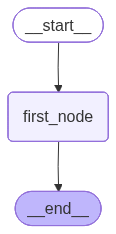

In [28]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [29]:
def chat(user_input: str, history):
    message={"role":"user", "content":user_input}
    messages=[message]
    state=State(messages=messages)
    result=graph.invoke(state)
    print(result)

    return result["messages"][-1].content

In [30]:
gr.ChatInterface(chat, type="messages").launch(share=False, debug=True)

* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


{'messages': [HumanMessage(content='Hi There', additional_kwargs={}, response_metadata={}, id='8474b6e3-1ed8-498e-8704-c2c48a18a434'), AIMessage(content='Pickles are squishy', additional_kwargs={}, response_metadata={}, id='d29d6077-6616-4974-8f64-7719ff88647e')]}
{'messages': [HumanMessage(content="what's up ", additional_kwargs={}, response_metadata={}, id='051f9fb8-ce62-4d05-9f37-f68b802878fb'), AIMessage(content='Codebages are moody', additional_kwargs={}, response_metadata={}, id='89702e9a-f024-4e1f-98da-1ceb3338e8eb')]}
{'messages': [HumanMessage(content='no way', additional_kwargs={}, response_metadata={}, id='ce7b78e0-e34a-40a0-ae31-1fb747fecbca'), AIMessage(content='Muffins are moody', additional_kwargs={}, response_metadata={}, id='b77b4b76-9661-42a4-9cb1-f7594fae1e2f')]}
Keyboard interruption in main thread... closing server.


# Chat with LLM(Openai)

In [35]:
class State(BaseModel):
    messages: Annotated[list, add_messages]

In [36]:
graph_builder=StateGraph(State)

In [37]:
llm=ChatOpenAI(model="gpt-4o-mini")

In [38]:
def chatbot_node(old_state: State) -> State:

    response=llm.invoke(old_state.messages)
    new_state=State(messages=[response])

    return new_state

graph_builder.add_node("chatbot_node", chatbot_node)

In [39]:
graph_builder.add_edge(START, "chatbot_node")
graph_builder.add_edge("chatbot_node", END)

In [40]:
graph=graph_builder.compile()

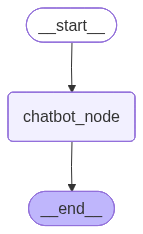

In [41]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [42]:
def chat(user_input: str, history):

    message={"role":"user", "content":user_input}
    state=State(messages=[message])

    result=graph.invoke(state)
    print(result)

    return result["messages"][-1].content

In [43]:
gr.ChatInterface(chat, type="messages").launch(share=False, debug=True)

* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


{'messages': [HumanMessage(content='Hi', additional_kwargs={}, response_metadata={}, id='9fd9e4f5-81b6-4bb3-9417-07bbc8d057b4'), AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-CN7iqxHufbx4QqRrkzofD3cum0j9W', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--c6942d62-6d34-40a3-b4be-de31fffeb940-0', usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}
{'messages': [HumanMessage(content='wha